In [76]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:


# provide a data folder with all the csv file to load extract transform and analyse it.
# acquiring data sets
customers = pd.read_csv("./data/customers.csv")
products = pd.read_csv("./data/products.csv")
transactions = pd.read_csv("./data/transactions.csv")

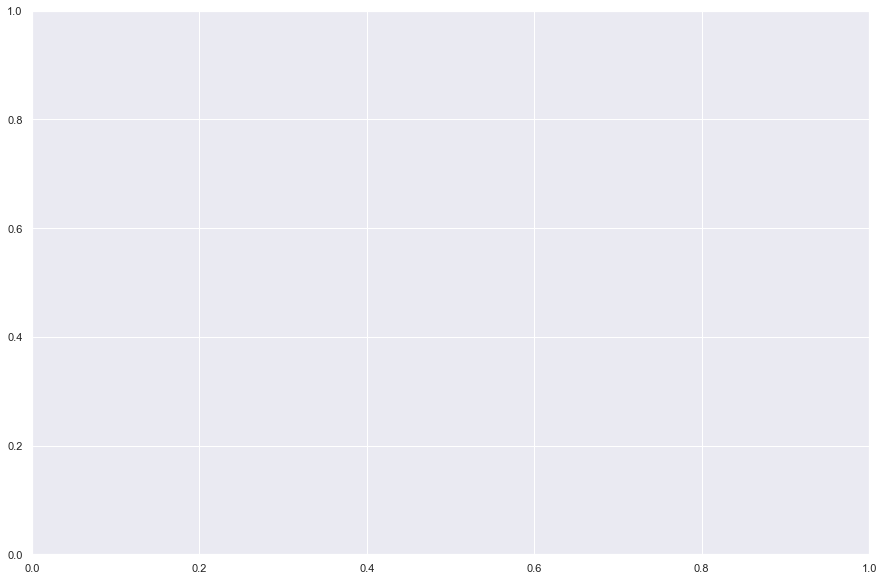

In [78]:
# plots configuration
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set(rc={'figure.figsize': (11.7, 8.27)})

#Initial Data analysis exploration.

##Analysis of the dataset and its structures


**Displaying the first and last 5 row of Customers data set.**

Getting to know more about its values with info and describe.

Getting data type information. Its seams that it doesn't contain null values there is only a numerical value.

This column **Birth** represent a year therefore it should be converted in date time.

There is a clearly a category value on the sex column and client_id seams as identify that can be used for table
interaction or join

In [79]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


**The description show information about all its column in particular **Birth**

The first and last 1970-01-01 00:00:00.000001929, 1970-01-01 00:00:00.000002004
Seam to describe the non-recorded linux date time that would start from 1970 so that 1929 and not 1970 the min year

* is and 2004 the max.
* There are 76 years.
* Top gender found is f

In [80]:
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


**Displaying the first and last 5 row of Products data set.**

Getting to know more about its values with info and describe.

In [81]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [82]:
products.tail()

,id_prod,price,categ
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1
3286,0_1920,25.16,0


There is 2 numerical values here, *price and categ* but this last one is used as categorical value instead.

The identified column here is clear id_prod an object.

No null values to be founded here.

In [83]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


 Here is described price and categ. what is here interesting to see is the min value of price -1.0
and a max of 300.0.

From categ the min, quartile and max seams to show only the possible values or unique values this can be confirm on
the result below with the method *unique()*.

In [84]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [85]:
print("unique categ values", products.categ.unique())

unique categ values [0 1 2]


 **Displaying the first and last 5 row of Transaction data set.**

Getting to know more about its values with info and describe.

In [86]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


In [87]:
transactions.tail()

,id_prod,date,session_id,client_id
337011,1_671,2021-05-28 12:35:46.214839,s_40720,c_3454
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268
337013,0_1256,2021-03-16 17:31:59.442007,s_7219,c_4137
337014,2_227,2021-10-30 16:50:15.997750,s_112349,c_5
337015,0_1417,2021-06-26 14:38:19.732946,s_54117,c_6714


**All data types here are objects this mean complex type that could be used as categorical value.**

Three of them have a prefix or suffix **id** already know from other data set and recognized as identify.
session_id is a new identify here.

**Date** is clear a date type could or should be converted to its proper type using *to_datetime()*

Also, here is no null values to be founded.

In [88]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


The transactions' description table have a interest top row value in all columns specially on date columns this is
probably an anomaly the suffix on the value as test must mean that this was a test data value session_id top is also of
interest here.

In [89]:
# transactions.date = pd.to_datetime(transactions.date)
transactions.describe()

,id_prod,date,session_id,client_id
count,337016,337016,337016,337016
unique,3266,336855,169195,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,1081,13,200,12855


## Display duplicates on specifics columns and understand it.

In [90]:
# id products looks like some duplicates because many clients can buy the same products with same ids
products[products.duplicated(subset='id_prod')]

,id_prod,price,categ


In [91]:
# If we there was none duplicates id products

pd.Series(products['id_prod'].unique())

0       0_1421
1       0_1368
2        0_731
3        1_587
4       0_1507
         ...  
3282      2_23
3283     0_146
3284     0_802
3285     1_140
3286    0_1920
Length: 3287, dtype: object

In [92]:
# There fore that can be duplicates clients id
customers[customers.duplicated(subset='client_id')]

,client_id,sex,birth


In [93]:
# If we there none duplicates then this filtered data frame result should be empty!
customers[customers.duplicated()]

,client_id,sex,birth


In [94]:
# can we say the same about session ids? that can be multiples clients id on with different sessions
transactions[transactions.duplicated(subset='session_id')]

,id_prod,date,session_id,client_id
563,0_1334,2021-12-20 19:54:33.947616,s_137385,c_1318
852,1_706,2021-04-13 09:11:54.849801,s_19950,c_1367
919,0_1446,2021-09-09 21:10:59.869217,s_87456,c_2917
1422,0_1097,2021-11-12 05:45:06.609257,s_118374,c_2438
1427,0_2162,2021-04-08 09:57:34.294741,s_17661,c_4525
...,...,...,...,...
337008,1_413,2022-01-10 13:47:23.973957,s_147795,c_3706
337009,0_1475,2021-07-22 13:47:39.400914,s_65686,c_5607
337010,1_498,2022-02-03 01:39:15.793010,s_159138,c_1857
337012,0_759,2021-06-19 00:19:23.917703,s_50568,c_6268


In [96]:
# If we there none duplicates then this filtered data frame result should be empty!
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
57261,T_0,test_2021-03-01 02:30:02.237439,s_0,ct_1
58802,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_0
60170,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [63]:
# And of curse clients can also have the same birth day.
customers[customers.duplicated(subset='birth')]

,client_id,sex,birth
6,c_285,f,1967
9,c_6866,m,1993
11,c_4389,m,1984
14,c_2322,f,1967
15,c_4701,f,1971
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [64]:
# If we there none duplicates then this filtered data frame result should be empty!
customers[customers.duplicated()]

,client_id,sex,birth


**So its look like there are duplicates only in the transaction data set, they seam to be test data**

### The sum of duplicates
**This is the last check for duplicates having none duplicates mean a sum of zero duplicates**

In [65]:
print('this are the sum of duplicates entries!')
transactions.duplicated().sum()

this are the sum of duplicates entries!


126

# Cleaning data set from test data!

**After deducing that transaction has this test data and before merge all together'
I can then in this next step use the test value as an identified, in all the others' data, filter and delete them.**

Getting all test data values.


In [66]:
# using string method to extracting all strings value that start with test.
test_datas = transactions[transactions.date.str.startswith('test')]
test_datas

# Find its unique id values for products id. using its identifying test products and remove it.

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [67]:
# get only unique products id from test data.
test_product_id = test_datas.id_prod.unique()

print('found test products that should be removed')
test_products = products.loc[products.id_prod.isin(test_product_id)]
test_products

found test products that should be removed


,id_prod,price,categ
731,T_0,-1.0,0


In [68]:
# drop test products.
products.drop(test_products.index, inplace=True)

# Find its unique id values for customers id. using its identifying test products and remove it.

In [69]:
# get only unique customer id from test data.
test_customer_id = test_datas.client_id.unique()

print('found test customers that should be removed')
test_customer = customers.loc[customers.client_id.isin(test_customer_id)]
test_customer

found test customers that should be removed


,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [70]:
# drop test customers.
customers.drop(test_customer.index, inplace=True)

# Find its unique id values for transaction id. using its identifying test products and remove it.

In [71]:
# get only unique transaction session id from test data.
test_transaction_id = test_datas.session_id.unique()

print('found test transactions that should be removed')
test_transaction = transactions.loc[transactions.session_id.isin(test_transaction_id)]
test_transaction

found test transactions that should be removed


,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


In [72]:
# drop test customers.
transactions.drop(test_transaction.index, inplace=True)

# Merge data sets to a single Dataframe.

## **After cleaning the all data set I can create a new data set merge from them and use it for further analysis**
## Check for duplicates on whole data set.

In [73]:
# Merging customers with transactions based on client id and id product.
data = transactions.merge(customers, on='client_id').merge(products, on='id_prod')

data.head(10)

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,4.99,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,4.99,0
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,4.99,0
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980,4.99,0
5,0_1483,2021-07-22 20:45:15.286364,s_65805,c_1609,m,1980,4.99,0
6,0_1483,2021-05-08 06:20:05.395325,s_31519,c_1609,m,1980,4.99,0
7,0_1483,2021-04-17 06:01:35.017859,s_21725,c_1609,m,1980,4.99,0
8,0_1483,2021-06-06 13:42:00.282408,s_44891,c_1609,m,1980,4.99,0
9,0_1483,2021-11-06 06:50:13.522171,s_115452,c_1609,m,1980,4.99,0


**At this point I can convert the date and birth column in to date time dtype.**

Final data set.

In [74]:
# Convert date and birth to datetime type.
data.date = pd.to_datetime(data.date)
data

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,4.99,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,4.99,0
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,4.99,0
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980,4.99,0
...,...,...,...,...,...,...,...,...
336708,0_1920,2021-04-13 18:36:10.252971,s_20115,c_7088,m,1987,25.16,0
336709,0_1920,2021-05-30 02:37:22.371278,s_41465,c_7748,f,1989,25.16,0
336710,2_23,2021-09-27 04:47:02.271354,s_96170,c_3976,f,1992,115.99,2
336711,2_28,2021-05-11 01:31:34.932056,s_32812,c_7613,f,1993,103.50,2


# Exporting the clean data set

In [75]:
#make sure the data folder exist.
dat_dir = "./data"
if not os.path.exists(dat_dir):
    os.mkdir(dir)

dat_dir = "./data"
if not os.path.exists(dat_dir):
    os.mkdir(dir)

compression_opts = dict(method='zip', archive_name='data.csv')
data.to_csv('./data/clean_data.zip', index=False, compression=compression_opts)

data.head()


,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,f,1977,4.99,0
1,0_1483,2021-12-27 11:11:12.123067,s_140787,c_5433,f,1981,4.99,0
2,0_1483,2021-10-27 04:56:38.293970,s_110736,c_857,m,1985,4.99,0
3,0_1483,2021-07-04 06:43:45.676567,s_57626,c_3679,f,1989,4.99,0
4,0_1483,2021-09-19 08:45:43.735331,s_92165,c_1609,m,1980,4.99,0
